# EDA and Stakeholder Questions

In [1]:
# Import the required libraries
import pandas as pd
import numpy as np

import scipy.stats as scs

import matplotlib.pyplot as plt
import matplotlib.colors
import seaborn as sns

%matplotlib inline

In [2]:
# Function Definitions

def get_pretty_percent(x, y):
    percentage = round(x/y, 3)
    return str(percentage) + '% '


In [3]:
# read in the processed data
cleaned_tweets = pd.read_csv('../data/cleaned_tweets_all.csv')
print(cleaned_tweets.shape)
cleaned_tweets.head(3)

(8698, 7)


,id,tweet_text,labeled_brand_or_product,detected_emotion,sentiment,brand,tweet_char_count
0,0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion,Negative,Apple,127
1,1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion,Positive,Apple,139
2,2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion,Positive,Apple,79


## Question 1: What is the general sentiment breakdown for these Tweets?
### How many/what percentage Positive/Negative/Neutral?


In [112]:
by_sentiment = cleaned_tweets.groupby(['sentiment'])['tweet_text'].count()
by_sentiment.sort_values(ascending=False, inplace=True)

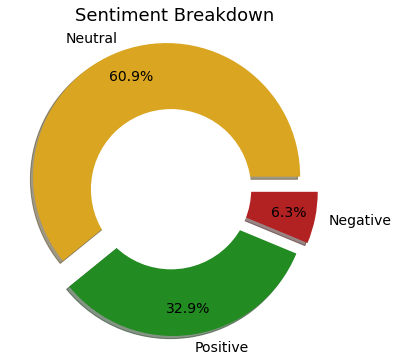

In [114]:
fig2, ax2 = plt.subplots(figsize=(6,6))

my_explode = (0.1, 0.1, 0.1)
my_colors = ['goldenrod','forestgreen', 'firebrick']
plt.pie(by_sentiment, labels=by_sentiment.index, autopct='%1.1f%%', shadow=True, 
        pctdistance=0.80, explode=my_explode, colors=my_colors)
plt.title('Sentiment Breakdown', size='18')

#draw circle and convert pie chart to Donut Chart
centre_circle = plt.Circle((0,0),0.60,fc='white')
fig2 = plt.gcf()
fig2.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle
ax2.axis('equal')  
plt.show()

In [88]:
by_sentiment_pos_neg = cleaned_tweets[cleaned_tweets['sentiment'] != 'Neutral'].groupby(['sentiment'])['tweet_text'].count()
by_sentiment_pos_neg.sort_values(ascending=False, inplace=True)

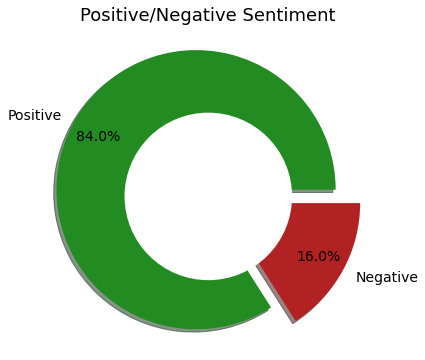

In [115]:
fig2, ax2 = plt.subplots(figsize=(6,6))

my_explode = (0.1, 0.1)
my_colors = ['forestgreen', 'firebrick']
plt.pie(by_sentiment_pos_neg, labels=by_sentiment_pos_neg.index, autopct='%1.1f%%', shadow=True, 
        pctdistance=0.80, explode=my_explode, colors=my_colors)
plt.title('Positive/Negative Sentiment', size='18')

#draw circle and convert pie chart to Donut Chart
centre_circle = plt.Circle((0,0),0.60,fc='white')
fig2 = plt.gcf()
fig2.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle
ax2.axis('equal')  
plt.show()

### Q1 Insights/Recommendations:
* Overall, the majority of the tweets are neutral. I am looking to create a binary classifier using only Positive/Negative sentiment. Be aware of too little training data.
* There is a __class imbalance__ issue here with more Positive than Negative labeled tweets. Be aware of this when training the classifier.


## Question 2: Are the two companies represented equally in the labeled data?

In [7]:
by_brand = cleaned_tweets.groupby('brand')['tweet_text'].count()
by_brand.sort_values(ascending=False, inplace=True)

In [8]:
by_brand

brand
Apple      5140
Google     2638
UNKNOWN     715
BOTH        205
Name: tweet_text, dtype: int64

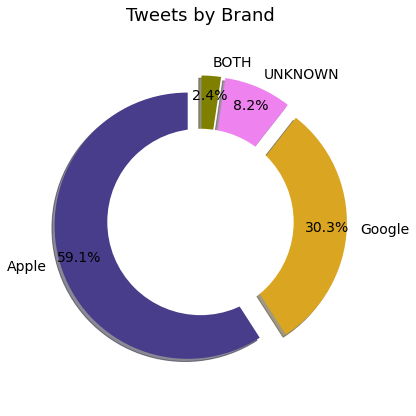

In [119]:
fig2, ax2 = plt.subplots(figsize=(6,6))

my_explode = (0.1, 0.1, 0.1, 0.1)
my_colors = ['darkslateblue', 'goldenrod', 'violet', 'olive']
plt.pie(by_brand, labels=by_brand.index, autopct='%1.1f%%', shadow=True, 
        startangle=90, pctdistance=0.85, explode=my_explode, colors=my_colors)
plt.title('Tweets by Brand', size='18')

#draw circle and convert pie chart to Donut Chart
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig2 = plt.gcf()
fig2.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle
ax2.axis('equal')  
plt.tight_layout()
plt.show()

### Q2 Insights/Recommendations:
* Apple is the most mentioned brand, followed by Google, then Unknown. A small percentage of tweets mention both brands.
* It will be interesting to see how, it at all, brand name mentions factor into the classifier.

## Question 3: What insights can the data provide for specific Brands?
 We are ignoring the Tweets where brand is unknown.

In [10]:
brand_by_sentiment = cleaned_tweets[cleaned_tweets['brand'] != 'UNKNOWN'].groupby(['brand', 'sentiment'])['tweet_text'].count()
brand_by_sentiment

brand   sentiment
Apple   Negative      398
        Neutral      2694
        Positive     2048
BOTH    Negative        3
        Neutral       192
        Positive       10
Google  Negative      142
        Neutral      1706
        Positive      790
Name: tweet_text, dtype: int64

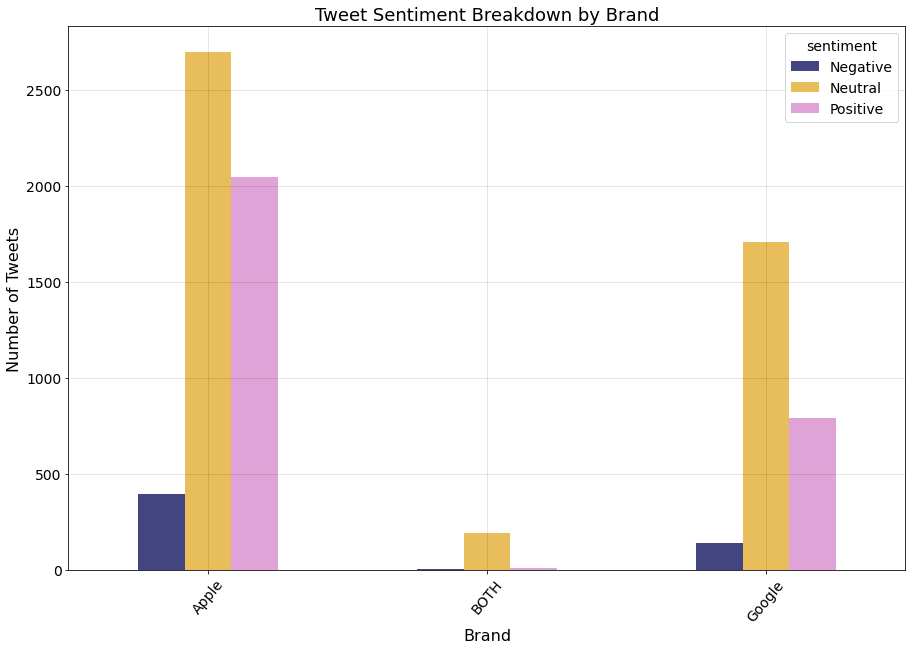

In [120]:
brand_by_sentiment.unstack().plot.bar(fontsize=14, rot=50, alpha=0.95, figsize=(15,10), colormap='tab20b')
plt.grid(color = 'black', alpha = 0.1, linestyle = '-', linewidth = 1)
plt.title('Tweet Sentiment Breakdown by Brand', size='18')
plt.xlabel('Brand',size=16)
plt.ylabel('Number of Tweets',size=16)
plt.yticks(size=14)
plt.show()

### Q3 Insights/Recommendations:
* Brand sentiment breakdown:
    * Both Apple and Google have many more Positive tweets than Negative
    * Both brands have many, many more Neutral tweets than Postive and Negative combined
    * How do the ratios of Negative to Positive tweets compare for Apple and Google?
        * 398:2018 Apple, 149:790 Google
        * 0.19 Apple, 0.18 Google
        * __Similar Ratios__